# Challenge 2.1: 

Can you plot the data used for historical backtesting / future extrapolation on a separate Jupyter notebook? 
Backtest-data-file reading from: 
/home/henrik/reflexer-digital-twin/data/runs/2021-11-10 09:15:53.078005-backtesting.csv.gz
Extrapolation-data-file reading from:
/home/henrik/reflexer-digital-twin/data/runs/2021-11-10 09:15:53.078005-extrapolation.csv.gz

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import gzip
import csv
import plotly.express as px
import json
import os
import plotly.offline as pyo
pyo.init_notebook_mode()
import seaborn as sns

In [4]:
df = pd.read_csv('/home/henrik/reflexer-digital-twin/data/runs/2021-11-10 09:15:53.078005-backtesting.csv.gz', compression='gzip')
print(df)

               kp   ki  leaky_factor  period  enabled  redemption_price  \
0    7.500000e-08  0.0           0.0   14400        1          3.029347   
1    7.500000e-08  0.0           0.0   14400        1          3.029347   
2    7.500000e-08  0.0           0.0   14400        1          3.029335   
3    7.500000e-08  0.0           0.0   14400        1          3.029338   
4    7.500000e-08  0.0           0.0   14400        1          3.029281   
..            ...  ...           ...     ...      ...               ...   
126  7.500000e-08  0.0           0.0   14400        1          3.027304   
127  7.500000e-08  0.0           0.0   14400        1          3.027314   
128  7.500000e-08  0.0           0.0   14400        1          3.027336   
129  7.500000e-08  0.0           0.0   14400        1          3.027383   
130  7.500000e-08  0.0           0.0   14400        1          3.027380   

     redemption_rate  proportional_error  integral_error   rai_reserve  ...  \
0           0.999993

I am not clever enough to make the fancy plots you have in the model, so I opt for a Seaborn pairplot :-)

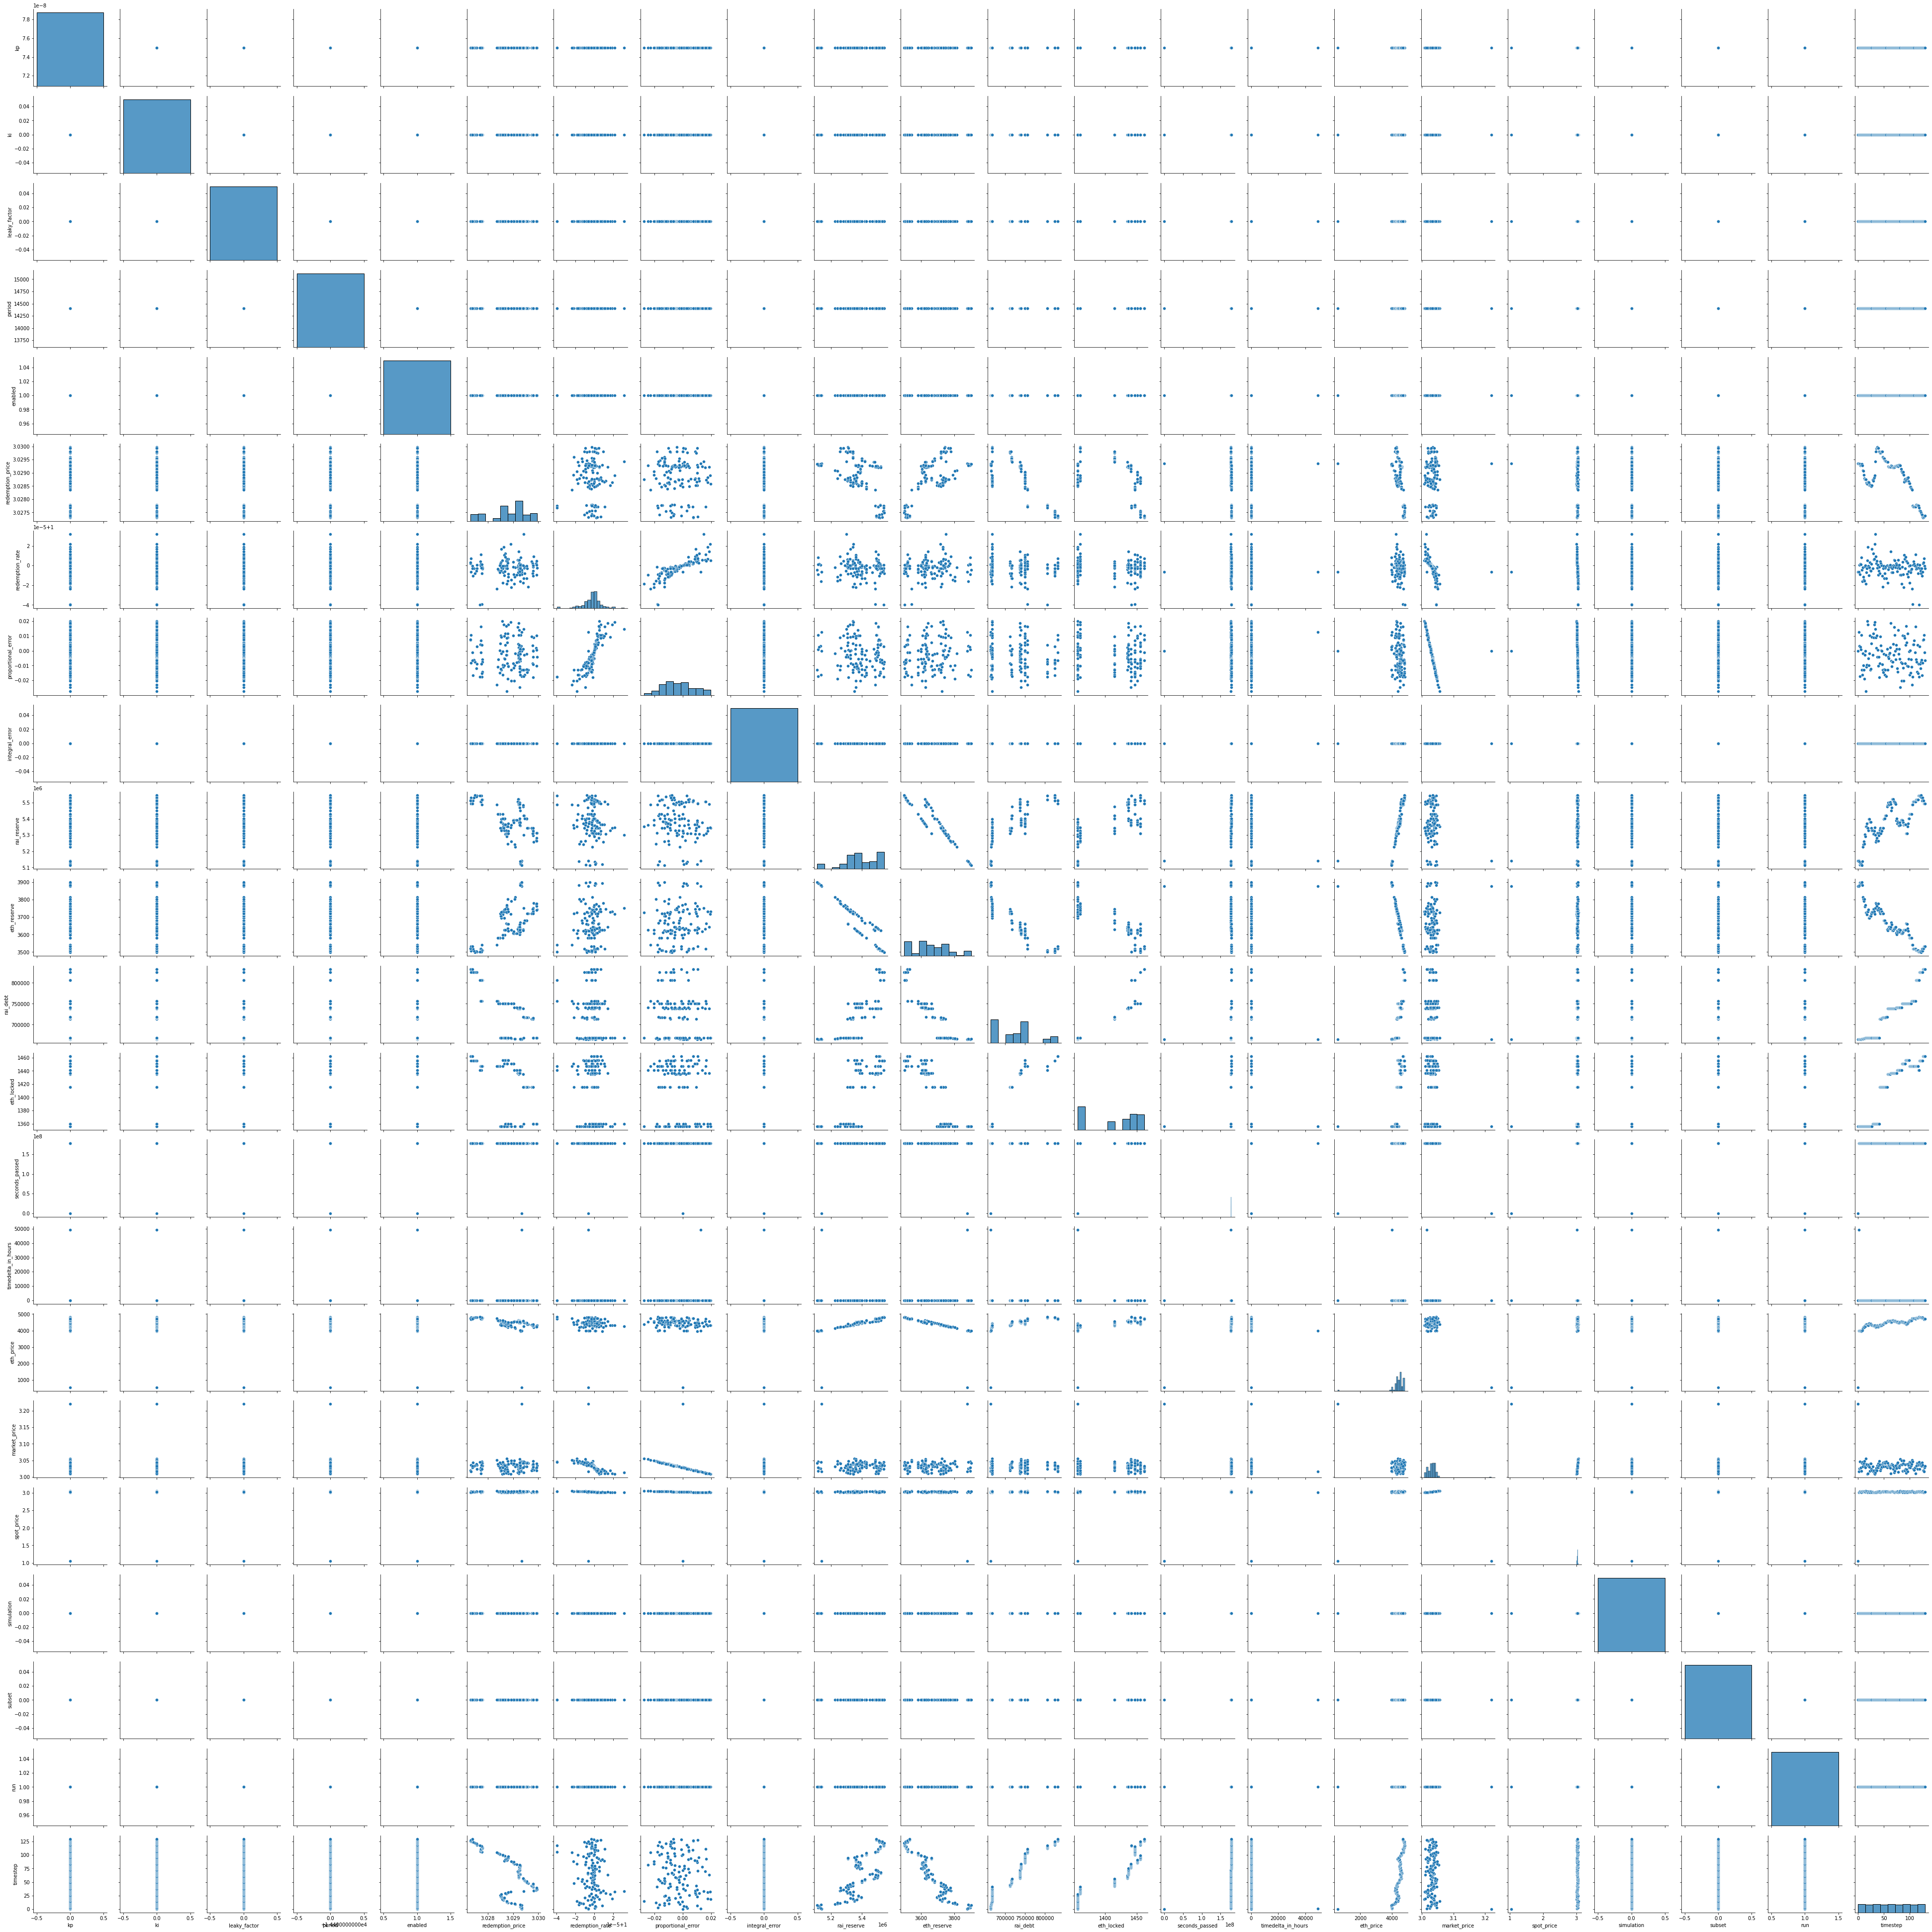

In [8]:
sns.pairplot(df)

In [10]:
df2 = pd.read_csv('/home/henrik/reflexer-digital-twin/data/runs/2021-11-10 09:15:53.078005-extrapolation.csv.gz', compression='gzip')
print(df2)

                kp   ki  leaky_factor  period  enabled  redemption_price  \
0     7.500000e-08  0.0           0.0   14400        1          3.027744   
1     7.500000e-08  0.0           0.0   14400        1          3.027744   
2     7.500000e-08  0.0           0.0   14400        1          3.027742   
3     7.500000e-08  0.0           0.0   14400        1          3.027753   
4     7.500000e-08  0.0           0.0   14400        1          3.027757   
...            ...  ...           ...     ...      ...               ...   
6755  7.500000e-08  0.0           0.0   14400        1          3.027620   
6756  7.500000e-08  0.0           0.0   14400        1          3.027601   
6757  7.500000e-08  0.0           0.0   14400        1          3.027573   
6758  7.500000e-08  0.0           0.0   14400        1          3.027563   
6759  7.500000e-08  0.0           0.0   14400        1          3.027553   

      redemption_rate  proportional_error  integral_error   rai_reserve  ...  \
0      

Repeat a pairplot to find out how you want to visualize the data if you are not as clever as the RAI / Blockscience team to make wonderful plots :-)

# Challenge 2.2

What happens if you modify the `data/controller_params.csv` file? 
For instance, what happens if the simulation is run with non-zero values on `ki` and `leaky_factor`? 
Or make kp go up or down?

In [14]:
df3 = pd.read_csv('/home/henrik/reflexer-digital-twin/data/controller_params.csv')
print(df3)

   eth_block            kp   ki  leaky_factor  period  enabled
0          0  4.000000e-08  0.0           0.0   14400        1
1   11907012  3.140000e-07  0.0           0.0   14400        1
2   11920359  2.000000e-07  0.0           0.0   14400        1
3   12000145  1.500000e-07  0.0           0.0   14400        1
4   12045798  1.000000e-07  0.0           0.0   14400        1
5   12367944  5.000000e-08  0.0           0.0   14400        1
6   13410160  7.500000e-08  0.0           0.0   14400        1


If you change the core PID controllers you influence the profile of the redemption price. Per your article in medium (https://medium.com/reflexer-labs/summoning-the-money-god-2a3f3564a5f2), the Kp controller is the proportional controller element, and a positive Ki term hastens a market crash relative to the proportional control, while a negative Ki term cushions the crash, allowing the system to recover. 

When a proportional controller (Kp only) or a PI controller (Kp & Ki) with a leaky factor integration is chosen, the steady state dynamics include constant negative redemption rates. If you instead exclude the leaky factor, the integral term creates a counter-productive acceleration effect of the crash.

# Challenge 2.3

Are you able to modify the existing notebook template? What if we print summary statistics like the average Redemption Price over all the trajectory. It would mean adding a column to the dataframe with the average redemption price and then adding this to all the plots, but I am unsure how to actually do that in the execution report plots.

# Challenge 2.4

Are you able to create a new notebook template that gets generated on each run? 

Hmmm....The logic would be to add to main.py for different experiments, listing them with numbers, in the  script so the model gcreates a temporary directory, where the experiment runs get collected, I have only recently practiced this, but not very good at it.

Experiment_list = []
experiment_string = '_'.join([str(experiment) for experiment in experiment_list])

tmp_dir = 'tmp/dataframes'
Path(tmp_dir).mkdir(parents=True, exist_ok=True)
